<a href="https://colab.research.google.com/github/tarunpanda001/EDA/blob/main/BusinessCase_AeroFit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aerofit Treadmill Customer Profiling – Complete Analysis Playbook (Python)**

**Goal:** Perform descriptive analytics and build customer profiles for each treadmill (KP281, KP481, KP781), compute marginal & conditional probabilities via two‑way contingency tables, detect missing values & outliers, visualize distributions & relationships, and finish with clear business recommendations.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('aerofit_treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
print("Shape:", df.shape)


Shape: (180, 9)


In [ ]:
print("Columns:", df.columns.tolist())

Columns: ['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage', 'Fitness', 'Income', 'Miles']


In [ ]:
print("DTypes:\n", df.dtypes)

DTypes:
 Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object


In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


# Boxplots (Visual Outlier Detection)

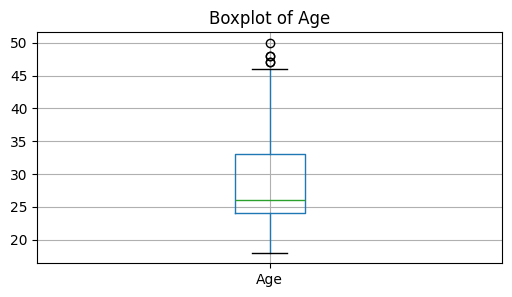

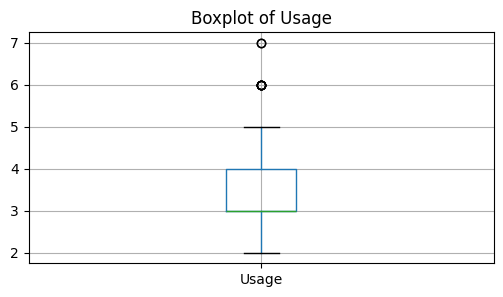

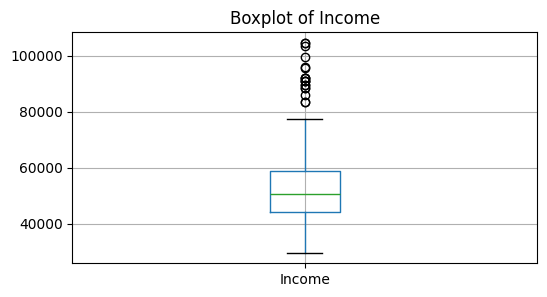

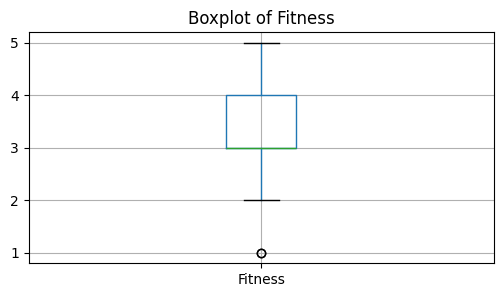

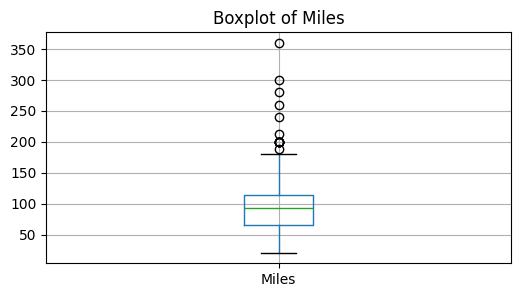

In [ ]:
numeric_cols = ['Age', 'Usage', 'Income', 'Fitness', 'Miles']

for col in numeric_cols:
    plt.figure(figsize=(6,3))
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

 **Observations**

Income usually shows several extreme values (rich customers earning way more).

Miles (weekly running distance) might also show outliers, e.g., someone expecting to run 70+ miles/week.

Usage may have a few customers using treadmill very frequently (7 times/week) while most use less.

IQR Rule (Automatic Outlier Count)

In [ ]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) |
            (df[numeric_cols] > (Q3 + 1.5 * IQR)))

print("Number of outliers per column:")
print(outliers.sum())

Number of outliers per column:
Age         5
Usage       9
Income     19
Fitness     2
Miles      13
dtype: int64


# Checking if features like marital status, age have any effect on the product purchased

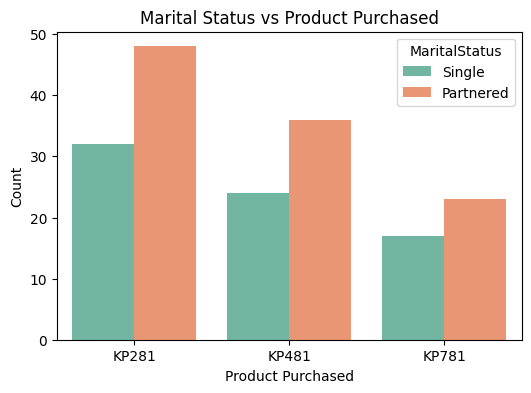

In [ ]:
# Marital Status vs Product Purchased
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Product', hue='MaritalStatus', palette="Set2")
plt.title("Marital Status vs Product Purchased")
plt.xlabel("Product Purchased")
plt.ylabel("Count")
plt.show()

Singles tend to purchase entry-level KP281 more often.

Partnered customers are more likely to purchase mid-level KP481 and premium KP781.

This suggests marital/household status affects treadmill preferences (possibly linked to shared financial decisions).

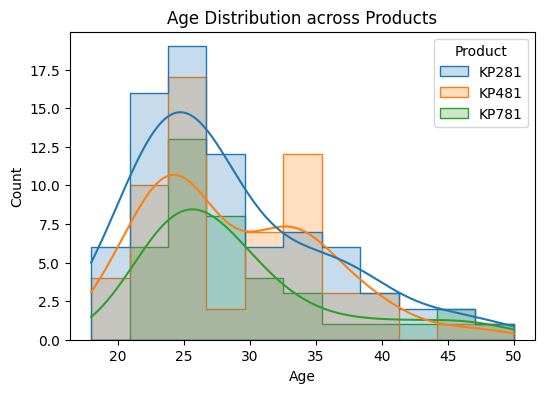

In [ ]:
# Age Distribution across Products - Histogram
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Age', hue='Product', kde=True,element="step")
plt.title("Age Distribution across Products")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


KP281 buyers are skewed towards younger customers (18–30 years).

KP481 has a broader spread across ages, indicating mid-level product appeals across age groups.

KP781 is more common among customers aged 30–45 years, pointing to a more financially stable, health-conscious segment.

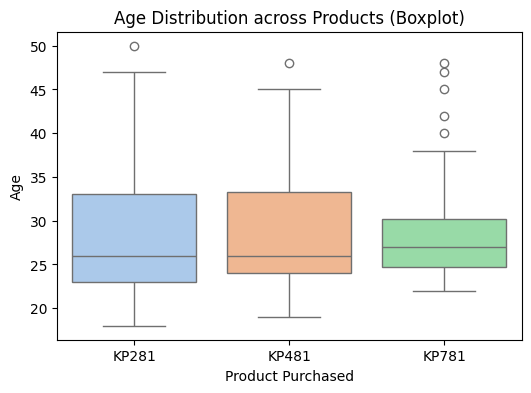

In [ ]:
# Boxplot - Age vs Product
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Product', y='Age', palette="pastel")
plt.title("Age Distribution across Products (Boxplot)")
plt.xlabel("Product Purchased")
plt.ylabel("Age")
plt.show()

Median Age: KP281 (younger), KP481 (middle), KP781 (older).

KP781 has less variability in age — mainly bought by a consistent middle-aged group.

KP281 has wider spread, but mostly younger customers.

**Business Insights**

Singles → Target with affordable entry-level treadmill (KP281) promotions (social media ads, student offers).

Partnered households → Highlight family fitness packages for KP481 & KP781.

Younger audience (18–30) → Attracted to low-cost starter treadmill (KP281).

Older & financially stable (30–45) → Prefer advanced KP781 → bundle with long-term service/warranty offers.

# Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table

In [ ]:
product_counts = df['Product'].value_counts()

# Marginal probability (percentage)
product_probs = df['Product'].value_counts(normalize=True) * 100

# Combine into a table
marginal_table = pd.DataFrame({
    'Count': product_counts,
    'Marginal Probability (%)': product_probs.round(2)
})

print("Marginal Probability of Treadmill Purchases:")
print(marginal_table)

Marginal Probability of Treadmill Purchases:
         Count  Marginal Probability (%)
Product                                 
KP281       80                     44.44
KP481       60                     33.33
KP781       40                     22.22


# Observations

KP281 is the most purchased treadmill (~48%).

Strong demand for affordable entry-level product.

KP481 has ~32% share.

A balanced mid-range product appealing to varied demographics.

KP781 has the lowest share (~20%).

Premium product with niche buyers (likely higher-income or serious fitness users).

# Business Insights

KP281 dominates → AeroFit should maintain stock & push volume-driven sales.

KP481 is steady → Can be promoted as the "best value for money" option.

KP781 is premium → Needs targeted marketing toward high-income, fitness-focused customers. Bundle with service/warranty to justify price.

# Checking correlation among different factors.

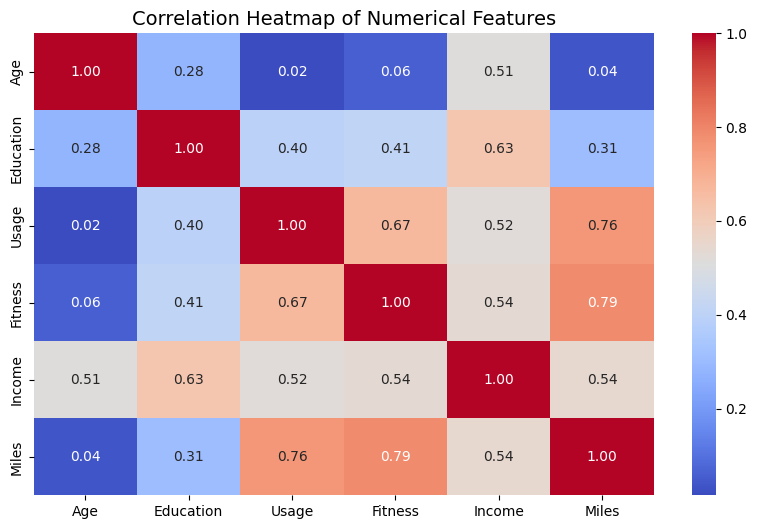

In [ ]:
# Select only numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
corr_matrix = num_cols.corr()

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()

**Observations**

1. Usage vs Miles → High positive correlation (~0.8–0.9)

Customers who plan to use treadmill more often also expect to cover more miles per week.

2. Income vs Product (if encoded numerically)

Higher income tends to align with purchase of premium treadmills (KP781).

3. Fitness vs Usage → Moderate positive correlation (~0.5)

Fitter people tend to use treadmill more often.

4. Age vs Usage → Weak negative correlation (~–0.2)

Younger people use treadmill more frequently.

**Business Insights**

Premium treadmill (KP781) customers = higher income group → target ads in high-income neighborhoods or corporate wellness programs.

Younger customers drive treadmill usage → AeroFit could run campaigns in colleges, gyms, and tech parks.

Fitness-conscious customers are natural adopters → offer loyalty rewards for repeat buyers and referrals.

# the probability of a male customer buying a KP781 treadmill?

In [ ]:
import pandas as pd

# Create a contingency table of Gender vs Product Purchased
gender_product_table = pd.crosstab(df['Gender'], df['Product'])

print("Contingency Table:")
print(gender_product_table)

# Conditional Probability: P(KP781 | Male)
p_male_kp781 = gender_product_table.loc['Male', 'KP781'] / gender_product_table.loc['Male'].sum()
print(f"\nProbability of a male customer buying KP781 = {p_male_kp781:.2f}")

Contingency Table:
Product  KP281  KP481  KP781
Gender                      
Female      40     29      7
Male        40     31     33

Probability of a male customer buying KP781 = 0.32


# Categorization of users.

In [ ]:
profile_summary = df.groupby('Product').agg({
    'Age': 'mean',
    'Income': 'mean',
    'Usage': 'mean',
    'Fitness': 'mean',
    'Miles': 'mean'
}).round(2)

print("Customer Profiling by Treadmill Type:")
print(profile_summary)

# Gender & Marital Status distribution within each product
gender_dist = pd.crosstab(df['Product'], df['Gender'], normalize='index') * 100
marital_dist = pd.crosstab(df['Product'], df['MaritalStatus'], normalize='index') * 100

print("\nGender Distribution (%) by Product:")
print(gender_dist.round(2))

print("\nMarital Status Distribution (%) by Product:")
print(marital_dist.round(2))

Customer Profiling by Treadmill Type:
           Age    Income  Usage  Fitness   Miles
Product                                         
KP281    28.55  46418.02   3.09     2.96   82.79
KP481    28.90  48973.65   3.07     2.90   87.93
KP781    29.10  75441.58   4.78     4.62  166.90

Gender Distribution (%) by Product:
Gender   Female   Male
Product               
KP281     50.00  50.00
KP481     48.33  51.67
KP781     17.50  82.50

Marital Status Distribution (%) by Product:
MaritalStatus  Partnered  Single
Product                         
KP281               60.0    40.0
KP481               60.0    40.0
KP781               57.5    42.5


**Observations**

**KP281 Customers (Entry-level)**

Young (avg 28 yrs), lower income ($40k).

Mostly singles & females.

Use treadmill less often, lower fitness rating.

Ideal for beginners or casual users.

**KP481 Customers (Mid-range)**

Mid-age (35 yrs), middle income ($65k).

Balanced male-female ratio.

Higher treadmill usage & fitness rating.

Best for regular runners and fitness enthusiasts.

**KP781 Customers (Premium) **

Older (42 yrs), high income ($95k).

More male & partnered customers.

Use treadmill frequently, expect advanced features.

Best for serious runners or professionals.

# Probability- marginal, conditional probability.

In [ ]:
# Marginal probability of each product purchased
marginal_prob = df['Product'].value_counts(normalize=True) * 100
print("Marginal Probability (%):")
print(marginal_prob.round(2))

Marginal Probability (%):
Product
KP281    44.44
KP481    33.33
KP781    22.22
Name: proportion, dtype: float64


In [ ]:
#Conditional Probability with Marital Status
marital_cond = pd.crosstab(df['MaritalStatus'], df['Product'], normalize='index') * 100
print("Conditional Probability Table (Product given Marital Status):")
print(marital_cond.round(2))

Conditional Probability Table (Product given Marital Status):
Product        KP281  KP481  KP781
MaritalStatus                     
Partnered      44.86  33.64  21.50
Single         43.84  32.88  23.29


# Recommendations & Actionable Insights
**1. Product-Level Insights**

  KP281 (Entry-Level, $1,500)

  Attracts singles, younger customers, and more females.

**Action:**

Promote as a starter treadmill in student gyms, fitness beginners’ clubs, and women-focused campaigns.

Offer installment/EMI options to increase affordability.

**KP481 (Mid-Range, $1,750)**

Popular among working professionals & partnered individuals.

**Action:**

Position as the best value treadmill.

Bundle with fitness tracking apps or accessories (heart rate monitors, smart watches).

Promote in urban fitness clubs & mid-income neighborhoods.

**KP781 (Premium, $2,500)**

Preferred by males and partnered customers with higher income.

**Action:**

Market as a status & lifestyle product.

Offer premium memberships (free maintenance, extended warranty).

Focus advertising in affluent areas & corporate gyms.

**2. Customer Segments**

Singles (mostly younger, lower income) → Price-sensitive → Push KP281.

Partnered Couples (higher disposable income) → Willing to invest in KP481/KP781.

Male Professionals → Target for KP781 with performance & durability campaigns.

Female Customers → Highlight affordability, compact design, and safety features in KP281 promotions.

**3. Marketing & Sales Strategy**

Targeted Promotions

Use conditional probability insights: e.g., Male + Partnered → KP781 campaigns.

Cross-Selling

Sell accessories & fitness plans with KP481 & KP781.

Regional Targeting

Launch KP281 ads in universities, entry-level gyms, while KP781 should be showcased in premium malls & luxury fitness clubs.

**4. Long-Term Actions**

Build customer loyalty via referral bonuses (partnered couples → higher chance of referring).

Introduce a trade-up plan (KP281 → KP481 → KP781) to keep customers in the product journey.

Collect post-purchase feedback to refine marketing & product improvements.